In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


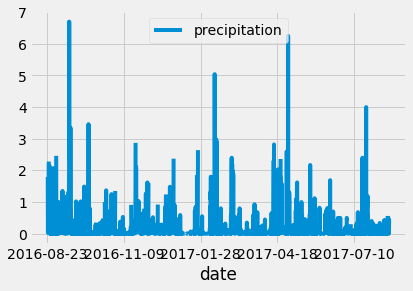

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df)
# print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

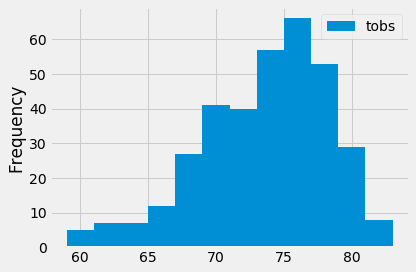

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
# print(results)
df = pd.DataFrame(results, columns=['tobs'])
# print(df)

df.plot.hist(bins=12)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [ ]:
# Identify key statistical data in June across all of the stations and years using the describe() function.
# Identify key statistical data in December across all stations and years using the describe() function.
# Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.

            day  month  year  precipitation
date                                       
2017-08-19   19      8  2017       0.030000
2017-08-20   20      8  2017       0.005000
2017-08-21   21      8  2017       0.193333
2017-08-22   22      8  2017       0.166667
2017-08-23   23      8  2017       0.132500
            day  month  year  precipitation  rain_per_hun       bin
date                                                               
2015-04-07    7      4  2015       0.000000      0.000000       <10
2012-12-01    1     12  2012       0.000000      0.000000       <10
2010-09-26   26      9  2010       0.000000      0.000000       <10
2012-12-03    3     12  2012       0.000000      0.000000       <10
2012-12-07    7     12  2012       0.000000      0.000000       <10
...         ...    ...   ...            ...           ...       ...
2013-11-10   10     11  2013       3.867143    386.714286  100-1000
2010-12-20   20     12  2010       3.931667    393.166667  100-1000
2011-01-13  

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5091fd188>,
 'caps': [<matplotlib.lines.Line2D at 0x1e509229248>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5091fd748>],
 'medians': [<matplotlib.lines.Line2D at 0x1e50a6e2288>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e50a6e2908>],
 'means': []}

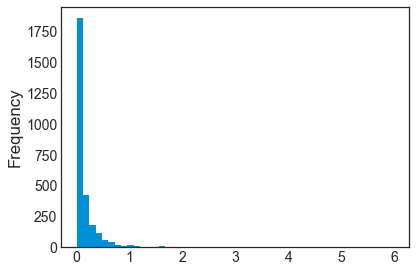

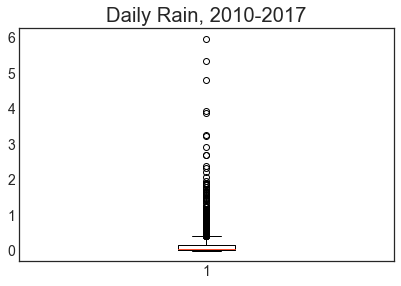

In [334]:
# write a query to retrieve descriptive statistics for June, for every year and every station
june_results = []
dec_results = []
df = []
mo_results = session.query(Measurement.date, Measurement.prcp)

df = pd.DataFrame(mo_results, columns=['date','precipitation'])
df.dropna(inplace=True)

# parse out the date into days, months, and years
df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

#calculate the mean rain per day (based on multiple station measures)
# one observation per day
daily_rain_df = df.groupby(['date'])[['date', 'day', 'month', 'year', 'precipitation']].mean() 

# summary statistics for all days in the query result
print(daily_rain_df.tail()) 
daily_rain_df.describe()

# classify rain amounts
rain_bins = [0, 10, 100, 1000, 10000]
amount_labels = ['<10', '10-100', '100-1000', '>1000']

daily_rain_df = daily_rain_df.assign(rain_per_hun = lambda x: x.precipitation *100)
daily_rain_df['bin'] = pd.cut(daily_rain_df['rain_per_hun'], 
                             bins=rain_bins, 
                             labels=amount_labels,
                             precision=1,
                             include_lowest=True)
# sort by rain amount
daily_rain_df.sort_values(by='rain_per_hun',inplace=True)

# create a new column with rain in parts per hundred
daily_rain_df = daily_rain_df.assign(rain_per_hun = lambda x: x.precipitation *100)
print(daily_rain_df)

# plot frequency
daily_rain_df['precipitation'].plot.hist(bins=50)
plt.tight_layout()

fig1, ax1 = plt.subplots()
ax1.set_title('Daily Rain, 2010-2017')
ax1.boxplot(daily_rain_df['precipitation'])

In [335]:
# make one dataframe per month for June and December data
june_rain_df = daily_rain_df[daily_rain_df['month']==6]
dec_rain_df = daily_rain_df[daily_rain_df['month']==12]

In [336]:
# retrieve summary statistics
print(june_rain_df.describe()) 
# print(dec_rain_df.tail())
print(dec_rain_df.describe())  

             day  month         year  precipitation  rain_per_hun
count  240.00000  240.0   240.000000     240.000000    240.000000
mean    15.50000    6.0  2013.500000       0.140569     14.056870
std      8.67353    0.0     2.296076       0.198470     19.846977
min      1.00000    6.0  2010.000000       0.000000      0.000000
25%      8.00000    6.0  2011.750000       0.018854      1.885417
50%     15.50000    6.0  2013.500000       0.079375      7.937500
75%     23.00000    6.0  2015.250000       0.189167     18.916667
max     30.00000    6.0  2017.000000       1.666667    166.666667
              day  month         year  precipitation  rain_per_hun
count  217.000000  217.0   217.000000     217.000000    217.000000
mean    16.000000   12.0  2013.000000       0.215665     21.566540
std      8.964952    0.0     2.004624       0.430695     43.069529
min      1.000000   12.0  2010.000000       0.000000      0.000000
25%      8.000000   12.0  2011.000000       0.016667      1.666667
50% 

In [339]:
# verify number of unique years in dataset
print(june_rain_df['year'].unique())
print(dec_rain_df['year'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017]
[2012 2013 2014 2010 2011 2016 2015]


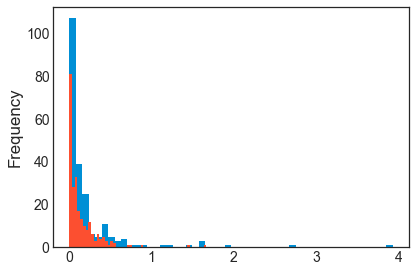

In [341]:
# plot histogram
dec_rain_df['precipitation'].plot.hist(bins=50)
plt.tight_layout()
# plot histograms
june_rain_df['precipitation'].plot.hist(bins=50)
plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e50a6737c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e50a6739c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e508d724c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e50704dd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e50a654088>],
 'means': []}

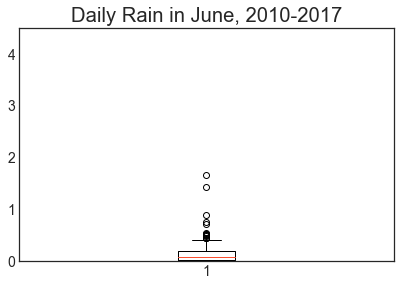

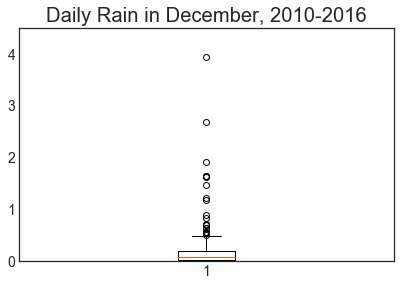

In [346]:
# boxplots
fig1, ax1 = plt.subplots()
ax1.set_title('Daily Rain in June, 2010-2017')
ax1.set_ylim([0, 4.5])
ax1.boxplot(june_rain_df['precipitation'])

fig2, ax2 = plt.subplots()
ax2.set_title('Daily Rain in December, 2010-2016')
ax2.set_ylim([0, 4.5])
ax2.boxplot(dec_rain_df['precipitation'])

In [ ]:
# The key differences in precipitation between June (2010-2017) and December (2010-2016) are found in the mean and maximum daily amounts.  
# The mean daily value is about 50% higher in December (mean=0.22 in) compared to June (mean=0.14 in).
# More extreme daily values were observed in December (max=3.93 in) than in June (max=1.67 in).
# Future analyses could include an analysis of: 
#         -variation across weather stations on the same day, to identify potential microclimates
#         -remove June 2017 from the comparison analysis, so that the two samples are equal in size
#         -compare the number of days without any precipitation
        